# Nursery Dataset with FFNN

Niniejszy notatnik zawiera eksperymenty przerpowadzone z zastosowaniem sieci neuronowej FFNN. Eksperymenty zostały przeprowadzone na zbiorze danych Nursery:
Rajkovic, V. (1989). Nursery [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5P88W. Zbiór jest dostępny w repozytroium UCI. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nursery_data = pd.read_csv('~/CS2025/computational_intelligence/data/nursery.csv', header=0)

Zbiór danych składa się z 8 atrybutów oraz zmiennej „pred", która stanowi w naszym zadaniu wektor klas. Zadanie, które będzie musiała rozwiązać sieć neuronowa, to klasyczny problem klasyfikacji wieloklasowej. Zbiór danych składa się z cech charakteryzująych rodziny ubiegające się o otrzymanie miejsca w żłobkach w Lublanie.
</br>
Aby rozstrzygnąć o tym, jaki priorytet rodzina będzie mieć przypisany do otrzymania miejsca w żłobku zebrano następujące dane:
</br>

- EMPLOY: zatrudnienie rodziców
- HAS_NURSE: jak jest stan obecneko żłobka, do którego uczęszcza dziecko
- FINANCE: finanse rodziców
- FORM: typ rodziny
- HOUSING: jakie są warunki w domu
- PARENTS: jaki prestiż ma zawód rodziców
- SOCIAL: jaki jest status społeczny
- HEALTH: jaki jest stan zdrowia 


In [3]:
nursery_data.head()

,parents,has_nurs,form,children,housing,finance,social,health,pred
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


# Wstępna analiza danych

Przed przystąpieniem do budowy modelu dokonano sprawdzenia danych.

In [4]:
# sprawdzenie typów danych
nursery_data.dtypes

parents     object
has_nurs    object
form        object
children    object
housing     object
finance     object
social      object
health      object
pred        object
dtype: object

Zbiór składa się z cech reprezentowanych przez napisy (typ object). Będzie konieczne dokonanie kodowania na wartości numeryczne.

In [5]:
# sprawdzenie brakujących wartości
nursery_data.isna().mean()
# nie ma brakujących wartości

parents     0.0
has_nurs    0.0
form        0.0
children    0.0
housing     0.0
finance     0.0
social      0.0
health      0.0
pred        0.0
dtype: float64

In [6]:
# sprawdzenie rozkładu klas
nursery_data.pred.value_counts()

pred
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: count, dtype: int64

In [7]:
y = nursery_data['pred']
X = nursery_data.drop('pred', axis=1)

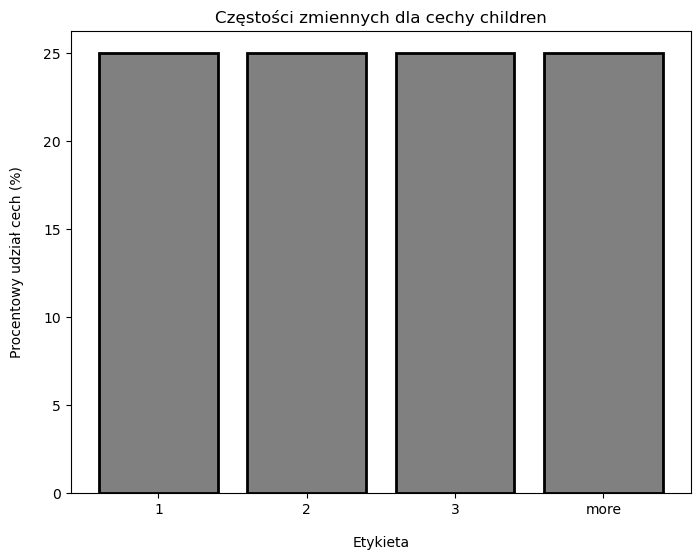

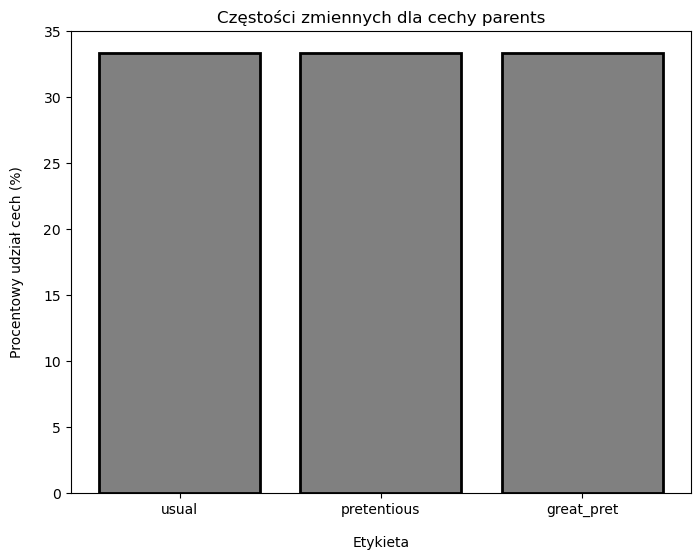

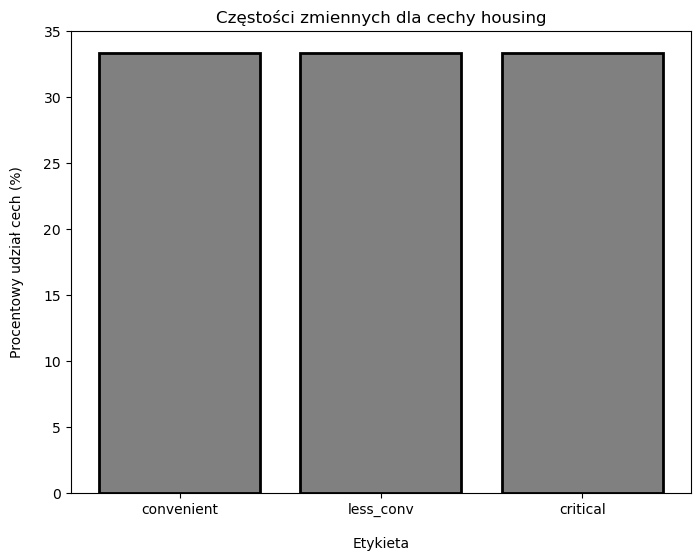

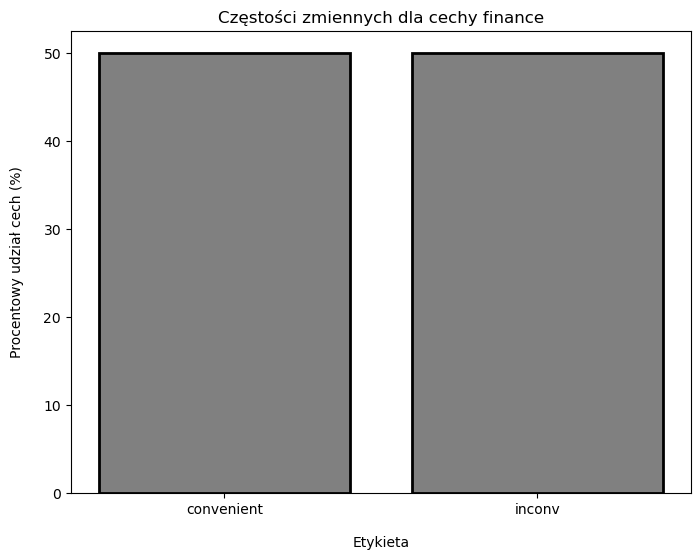

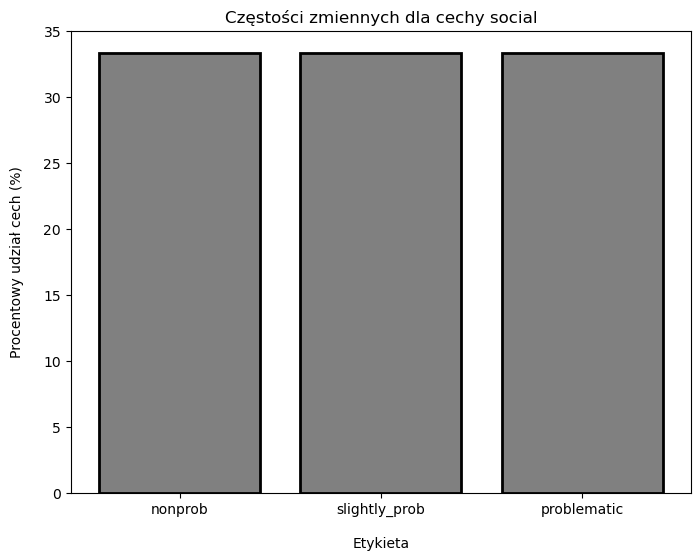

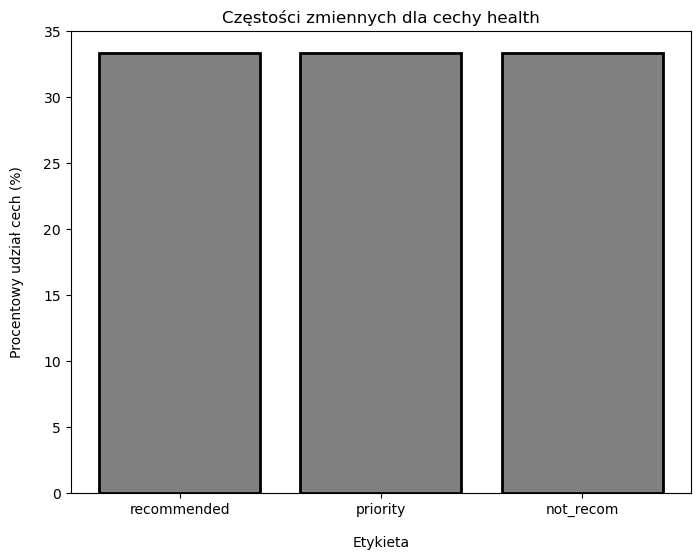

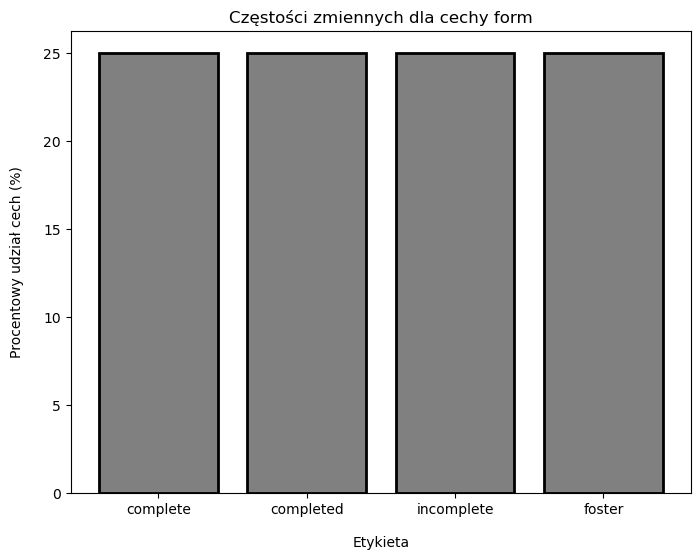

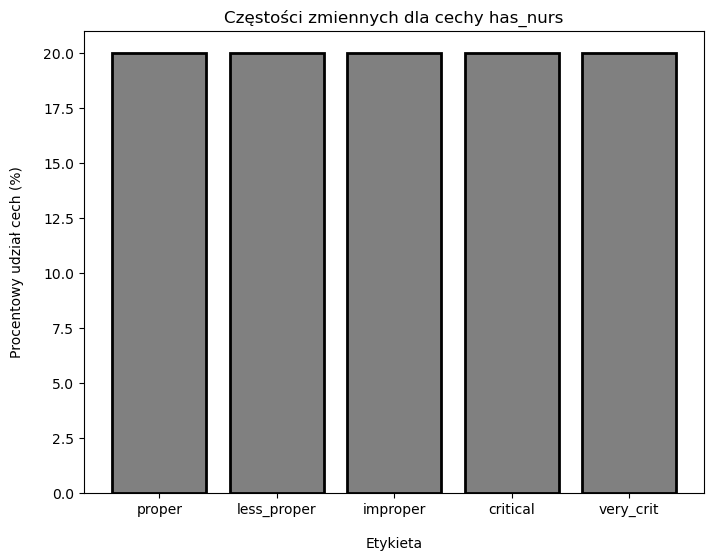

In [8]:
#pobieram etykiety kolumn
labels = ['children', 'parents', 'housing', 'finance', 'social', 'health', 'form', 'has_nurs']       
for label in labels:    
    feature = X[label].value_counts().sort_values()
    percent_feature = (feature.values / sum(feature.values)) * 100
    fig, ax = plt.subplots(figsize = (8,6))
    bars = plt.bar(feature.index, percent_feature, edgecolor = 'black', color = 'grey', linewidth = 2)
    plt.title(f"Częstości zmiennych dla cechy {label}")
    plt.ylabel("Procentowy udział cech (%)", labelpad=14)
    plt.xlabel("Etykieta", labelpad=14)
    plt.show()

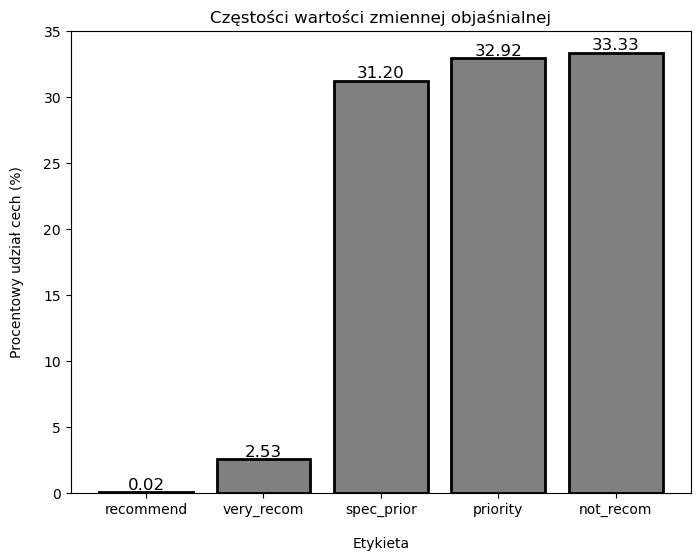

In [9]:
label ='pred'
feature = y.value_counts().sort_values()
percent_feature = (feature.values / sum(feature.values)) * 100
fig, ax = plt.subplots(figsize = (8,6))
bars = plt.bar(feature.index, percent_feature, edgecolor = 'black', color = 'grey', linewidth = 2)
plt.title(f"Częstości wartości zmiennej objaśnialnej")
plt.ylabel("Procentowy udział cech (%)", labelpad=14)
ax.bar_label(bars, color = 'black', fmt = '%.2f', size = 12)
plt.xlabel("Etykieta", labelpad=14)
plt.show()

# Uwaga

Nasz zbiór składa się z danych o charakterze kategorycznym i nominalnym. Konieczne jest zastosowanie kodowania.
<br/>
has_nurs: proper → less_proper → improper → critical → very_crit (rosnący poziom problemu)
<br/>
children: 1 → 2 → 3 → more (liczba dzieci, rosnąco)
<br/>
housing: convenient → less_conv → critical (poziom wygody malejąco)
<br/>
finance: convenient → inconv (wygoda finansowa)
<br/>
social: nonprob → slightly_prob → problematic (rosnący poziom problemu społecznego)
<br/>
health: recommended → priority → not_recom (poziom rekomendacji)


In [10]:
from sklearn.preprocessing import OrdinalEncoder


# zmienne o charakterze porządkowym
children = ['1', '2', '3', 'more']
has_nurs = ['proper', 'less_proper', 'improper', 'critical', 'very_crit']
finance = ['convenient', 'inconv']
housing = ['convenient', 'less_conv', 'critical']
social = ['nonprob', 'slightly_prob', 'problematic']
health = ['recommended', 'priority', 'not_recom']
pred_classes = ['not_recom', 'recommend', 'very_recom', 'priority', 'spec_prior']


enc_children = OrdinalEncoder(categories=[children])
enc_has_nurs = OrdinalEncoder(categories=[has_nurs])
enc_finance = OrdinalEncoder(categories=[finance])
enc_housing = OrdinalEncoder(categories=[housing])
enc_social = OrdinalEncoder(categories=[social])
enc_health = OrdinalEncoder(categories=[health])
enc_pred = OrdinalEncoder(categories=[pred_classes])

nursery_data['children'] = enc_children.fit_transform(nursery_data[['children']])
nursery_data['has_nurs'] = enc_has_nurs.fit_transform(nursery_data[['has_nurs']])
nursery_data['finance'] = enc_finance.fit_transform(nursery_data[['finance']])
nursery_data['housing'] = enc_housing.fit_transform(nursery_data[['housing']])
nursery_data['social'] = enc_social.fit_transform(nursery_data[['social']])
nursery_data['health'] = enc_health.fit_transform(nursery_data[['health']])
nursery_data['pred'] = enc_pred.fit_transform(nursery_data[['pred']])


#zmienne o charakterze nominalnym, zastosowanie kodowania [0, 1]
nursery_data = pd.get_dummies(nursery_data, columns=['parents', 'form'], drop_first=False)

In [11]:
for var_name, (categories, encoder) in {
    'children': (children, enc_children),
    'has_nurs': (has_nurs, enc_has_nurs),
    'finance': (finance, enc_finance),
    'housing': (housing, enc_housing),
    'social': (social, enc_social),
    'health': (health, enc_health),
    'pred': (pred_classes, enc_pred)
}.items():
    print(f"\nZmienna: {var_name}")
    print("Kategorie i ich odpowiadające wartości po kodowaniu:")
    for category, code in zip(categories, range(len(categories))):
        print(f"  {category}: {code}")


Zmienna: children
Kategorie i ich odpowiadające wartości po kodowaniu:
  1: 0
  2: 1
  3: 2
  more: 3

Zmienna: has_nurs
Kategorie i ich odpowiadające wartości po kodowaniu:
  proper: 0
  less_proper: 1
  improper: 2
  critical: 3
  very_crit: 4

Zmienna: finance
Kategorie i ich odpowiadające wartości po kodowaniu:
  convenient: 0
  inconv: 1

Zmienna: housing
Kategorie i ich odpowiadające wartości po kodowaniu:
  convenient: 0
  less_conv: 1
  critical: 2

Zmienna: social
Kategorie i ich odpowiadające wartości po kodowaniu:
  nonprob: 0
  slightly_prob: 1
  problematic: 2

Zmienna: health
Kategorie i ich odpowiadające wartości po kodowaniu:
  recommended: 0
  priority: 1
  not_recom: 2

Zmienna: pred
Kategorie i ich odpowiadające wartości po kodowaniu:
  not_recom: 0
  recommend: 1
  very_recom: 2
  priority: 3
  spec_prior: 4


In [12]:
nursery_data['pred'].value_counts()

pred
0.0    4320
3.0    4266
4.0    4044
2.0     328
1.0       2
Name: count, dtype: int64

# Podział zboru
Zbiór danych został podzielony na zbiór testowy, walidacyjny i treningowy w następującej proporcji:

- Zbiór treningowy (60%)
- Zbiór testow (20%)
- Zbiór walidacyny (20%)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

y = nursery_data['pred']
X = nursery_data.drop('pred', axis=1)

#klasy są niezbalansowane, więc albo usunięcie albo wprowadzenie wag
# użycie stratify, aby utrzymać proporcje klas w każdym zbiorze
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print("Kształt zbioru treningowego cech (X_train):", X_train.shape)
print("Kształt zbioru walidacyjnego cech (X_val):", X_val.shape)
print("Kształt zbioru testowego cech (X_test):", X_test.shape)
print("Kształt zbioru treningowego zmiennej docelowej (y_train):", y_train.shape)
print("Kształt zbioru walidacyjnego zmiennej docelowej (y_val):", y_val.shape)
print("Kształt zbioru testowego zmiennej docelowej (y_test):", y_test.shape)


print("\n" + "="*60)
print("ROZKŁAD KLAS W ZBIORACH")
print("="*60)
print("\nCały zbiór:")
print(nursery_data['pred'].value_counts().sort_index())

print("\nZbór treningowy:")
print(y_train.value_counts().sort_index())

print("\nZbór walidacyjny:")
print(y_val.value_counts().sort_index())

print("\nZbór testowy:")
print(y_test.value_counts().sort_index())
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

print("\n" + "="*60)
print("CLASS WEIGHTS (wagi dla każdej klasy)")
print("="*60)
class_names = ['not_recom', 'recommend', 'very_recom', 'priority', 'spec_prior']
for class_idx, weight in sorted(class_weight_dict.items()):
    print(f"Klasa {int(class_idx)} ({class_names[int(class_idx)]}): {weight:.4f}")

Kształt zbioru treningowego cech (X_train): (7776, 13)
Kształt zbioru walidacyjnego cech (X_val): (2592, 13)
Kształt zbioru testowego cech (X_test): (2592, 13)
Kształt zbioru treningowego zmiennej docelowej (y_train): (7776,)
Kształt zbioru walidacyjnego zmiennej docelowej (y_val): (2592,)
Kształt zbioru testowego zmiennej docelowej (y_test): (2592,)

ROZKŁAD KLAS W ZBIORACH

Cały zbiór:
pred
0.0    4320
1.0       2
2.0     328
3.0    4266
4.0    4044
Name: count, dtype: int64

Zbór treningowy:
pred
0.0    2592
1.0       1
2.0     197
3.0    2560
4.0    2426
Name: count, dtype: int64

Zbór walidacyjny:
pred
0.0    864
1.0      1
2.0     65
3.0    853
4.0    809
Name: count, dtype: int64

Zbór testowy:
pred
0.0    864
2.0     66
3.0    853
4.0    809
Name: count, dtype: int64

CLASS WEIGHTS (wagi dla każdej klasy)
Klasa 0 (not_recom): 0.6000
Klasa 1 (recommend): 1555.2000
Klasa 2 (very_recom): 7.8944
Klasa 3 (priority): 0.6075
Klasa 4 (spec_prior): 0.6411


In [14]:
X_train.head()

,has_nurs,children,housing,finance,social,health,parents_great_pret,parents_pretentious,parents_usual,form_complete,form_completed,form_foster,form_incomplete
7866,4.0,1.0,2.0,0.0,0.0,0.0,False,True,False,True,False,False,False
8275,4.0,1.0,0.0,1.0,1.0,1.0,False,True,False,False,False,False,True
290,0.0,1.0,1.0,0.0,0.0,2.0,False,False,True,False,True,False,False
1408,1.0,2.0,0.0,0.0,1.0,1.0,False,False,True,False,False,False,True
8859,0.0,0.0,0.0,0.0,1.0,0.0,True,False,False,False,True,False,False


# Tworzenie modelu

Pierwszy model zostal stworzony z zastosowaniem strategii polegającej na przypisaniu wag wszysktim klasom, aby zrekompensować brak zbalansowania.

In [15]:
import tensorflow as tf
import keras
from keras import layers
from sklearn.metrics import classification_report, confusion_matrix

keras.utils.set_random_seed(42)


model = keras.Sequential(
    [
        layers.Dense(20, input_shape = (13,), activation='relu'),
        layers.Dense(5, activation='softmax')
    ]
)

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


result = model.fit(
    X_train, y_train, 
    epochs=100, 
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict  # Dodajemy wagi dla klas
)

print("\n" + "="*60)
print("WYNIKI MODELU BAZOWEGO Z CLASS_WEIGHT")
print("="*60)
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Val Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")





Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.2090 - loss: 1.8174 - val_accuracy: 0.6192 - val_loss: 1.1027
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.6410 - loss: 1.2497 - val_accuracy: 0.7064 - val_loss: 0.8652
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.7145 - loss: 0.8739 - val_accuracy: 0.7492 - val_loss: 0.7250
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.7600 - loss: 0.6789 - val_accuracy: 0.7843 - val_loss: 0.6322
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.7893 - loss: 0.5684 - val_accuracy: 0.8083 - val_loss: 0.5650
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.8128 - loss: 0.5014 - val_accuracy: 0.8291 - val_loss: 0.5144
Epoch 7/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.8324 - loss: 0.4499 - val_accuracy: 0.8422 - val_loss: 0.4757
Epoch 8/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.8492 - loss: 0.4060 - val_

Model uzyskał 0.9333 poprawności na zbiorze testowy, co jest bardzo wysokim wynikiem. 

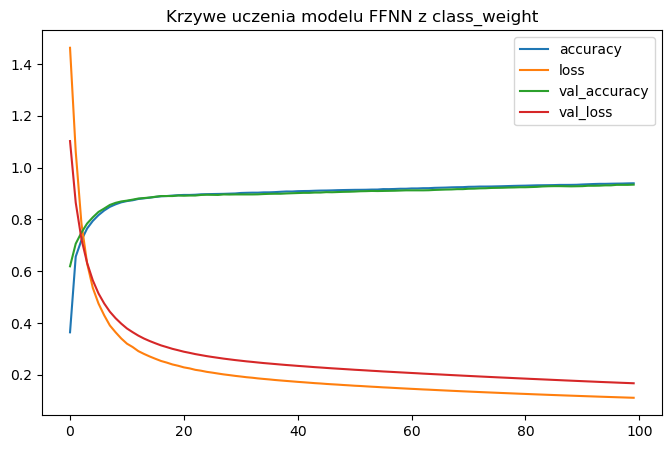

In [16]:
history = pd.DataFrame(data=result.history)
plt.figure(figsize=(8,5))
plt.plot(history)
plt.legend(history.columns)
plt.title("Krzywe uczenia modelu FFNN z class_weight")
plt.show()


Jeżeli zobaczymy na powyższy wykres, to widać, że w kolejnych epokach popełniany na zbiorze treningowym błąd spada. Model dobrze się uczy.
Jeżeli chodzi o możliwości generalizacji, to również wartość błędu zaczyna maleć na zbiorze walidacyjnym wraz ze wzrostme epok.

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step

Raport klasyfikacji:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
   recommend       0.00      0.00      0.00         0
  very_recom       0.64      0.98      0.77        66
    priority       0.91      0.88      0.90       853
  spec_prior       0.92      0.91      0.92       809

    accuracy                           0.93      2592
   macro avg       0.70      0.76      0.72      2592
weighted avg       0.94      0.93      0.94      2592



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


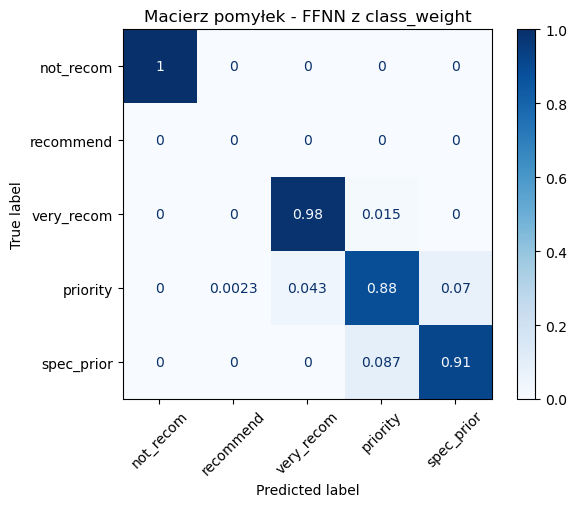

In [17]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(X_test)
mlcm = multilabel_confusion_matrix(y_test, np.argmax(y_pred, axis=1))
# for i, cm in enumerate(mlcm):
#     print(f"\nMacierz pomyłek dla klasy {i} ({class_names[i]}):")
#     print(cm)

y_pred_classes = np.argmax(y_pred, axis=1)
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_classes,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize='true',
    xticks_rotation= 45
)
cm_display.ax_.set_title("Macierz pomyłek - FFNN z class_weight")
plt.show()

Co ciekawe dla klasy recommend otrzymano accuracy = 0, wynika to z tego, że próbka jest zbyt mała i nawet przy zastosowaniu wag nie pozwala na poprawną kalsyfikację.

# Szukanie najlepszego modelu za pomocą strojenia hiperparametrów

- zastosowano funkcje aktywacji relu w warstwach ukrytych
- zastosowano funkcje softmax w warstwie wyjściowej (ponieważ mamy problem klasyfikacji)


In [18]:
import keras_tuner as kt

#strojenie hiperparametrów
def build_model(hp):
    model = keras.Sequential()
    
    
    units_1 = hp.Int('units_1', min_value=10, max_value=100, step=10)
    model.add(layers.Dense(units_1, input_shape=(13,), activation='relu'))
    
    
    dropout_rate = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(layers.Dropout(dropout_rate))
    
    
    add_second_layer = hp.Boolean('add_second_layer')
    if add_second_layer:
        units_2 = hp.Int('units_2', min_value=10, max_value=50, step=10)
        model.add(layers.Dense(units_2, activation='relu'))
        model.add(layers.Dropout(dropout_rate))
    
   
    model.add(layers.Dense(5, activation='softmax'))
    
    
    optimizer = hp.Choice('optimizer', values=['sgd', 'adam', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    
    if optimizer == 'sgd':
        opt = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model


tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='hyperparameter_tuning',
    project_name='nursery_ffnn'
)


print("Uruchamianie hyperparameter tuning z class_weight...\n")
tuner.search(
    X_train, y_train, 
    epochs=50, 
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,  
    verbose=1
)

Reloading Tuner from hyperparameter_tuning/nursery_ffnn/tuner0.json
Uruchamianie hyperparameter tuning z class_weight...



In [19]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Najlepsze hiperparametry:")
print(f"- Liczba neuronów w 1. warstwie: {best_hps.get('units_1')}")
print(f"- Dropout: {best_hps.get('dropout')}")
print(f"- Druga warstwa: {best_hps.get('add_second_layer')}")
if best_hps.get('add_second_layer'):
    print(f"- Liczba neuronów w 2. warstwie: {best_hps.get('units_2')}")
print(f"- Optymalizator: {best_hps.get('optimizer')}")
print(f"- Learning rate: {best_hps.get('learning_rate'):.6f}")

#stworzenie modelu z najlepszymi parametrami
best_model = tuner.hypermodel.build(best_hps)
history_best = best_model.fit(
    X_train, y_train, 
    epochs=100, 
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,  
    verbose=0
)


print("\n" + "="*60)
print("WYNIKI NAJLEPSZEGO MODELU")
print("="*60)
train_loss, train_accuracy = best_model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = best_model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Najlepsze hiperparametry:
- Liczba neuronów w 1. warstwie: 80
- Dropout: 0.0
- Druga warstwa: True
- Liczba neuronów w 2. warstwie: 10
- Optymalizator: rmsprop
- Learning rate: 0.001775


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



WYNIKI NAJLEPSZEGO MODELU
Train Accuracy: 0.9950
Val Accuracy: 0.9904
Test Accuracy: 0.9919


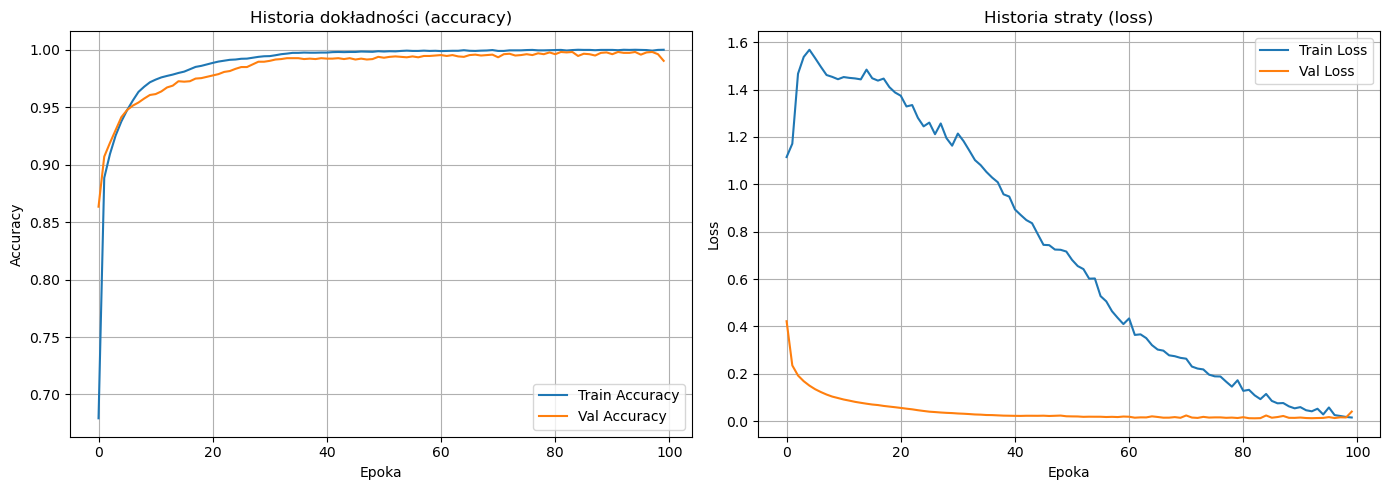

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].plot(history_best.history['accuracy'], label='Train Accuracy')
axes[0].plot(history_best.history['val_accuracy'], label='Val Accuracy')
axes[0].set_title('Historia dokładności (accuracy)')
axes[0].set_xlabel('Epoka')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)


axes[1].plot(history_best.history['loss'], label='Train Loss')
axes[1].plot(history_best.history['val_loss'], label='Val Loss')
axes[1].set_title('Historia straty (loss)')
axes[1].set_xlabel('Epoka')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step

Raport klasyfikacji:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
  very_recom       1.00      1.00      1.00        66
    priority       1.00      0.98      0.99       853
  spec_prior       0.97      1.00      0.99       809

    accuracy                           0.99      2592
   macro avg       0.99      0.99      0.99      2592
weighted avg       0.99      0.99      0.99      2592



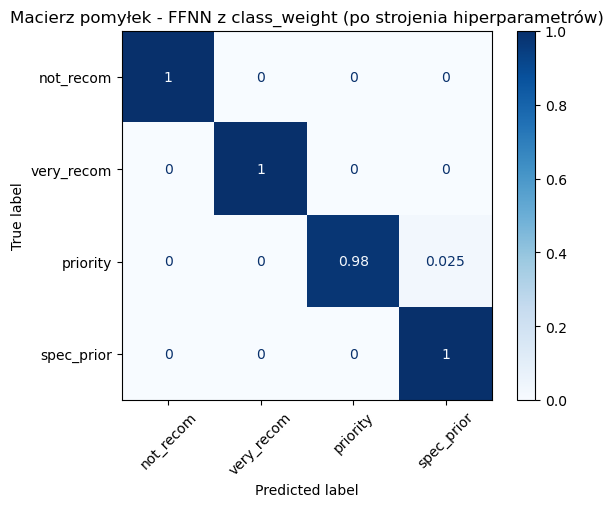

In [21]:
y_test.unique()
# W zbiorze testowym nie mamy klasy z oznaczeniem 1!
y_pred_best_model = best_model.predict(X_test)
mlcm_for_best = multilabel_confusion_matrix(y_test, np.argmax(y_pred_best_model, axis=1))
y_pred_classes_best_model = np.argmax(y_pred_best_model, axis=1)
print("\nRaport klasyfikacji:")
class_names_special = ['not_recom', 'very_recom', 'priority', 'spec_prior']
print(classification_report(y_test, y_pred_classes_best_model, target_names=class_names_special))
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_classes_best_model,
    display_labels=class_names_special,
    cmap=plt.cm.Blues,
    normalize='true',
    xticks_rotation= 45
)
cm_display.ax_.set_title("Macierz pomyłek - FFNN z class_weight (po strojenia hiperparametrów)")
plt.show()



# Dyskusja wyników

Uzyskane rezultaty są bardzo wysokie. Model doskonale radzi sobie z tym zadaniem. Zbiór jest bardzo dobrze separowalny na rozłączne klasy z idealną trafnością. 

# Dodatkowa próba
Nasza zmienna objaśnialna jest niezbalansowana. W szczególności klasa „recommended" jest niedoreprezentowana. Zobaczmy jak sieć poradzi sobie z tym zadaniem, gdy pozbędziemy się wartości „reccomended". 

In [22]:
nursery_data_without_recom = nursery_data[nursery_data['pred'] != 1]
y_2 = nursery_data_without_recom['pred']
X_2 = nursery_data_without_recom.drop('pred', axis=1)


# użycie stratify, aby utrzymać proporcje klas w każdym zbiorze
X2_temp, X2_test, y2_temp, y2_test = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42, stratify=y_2
)


X_train, X_val, y_train, y_val = train_test_split(
    X2_temp, y2_temp, test_size=0.25, random_state=42, stratify=y2_temp
)

print("Kształt zbioru treningowego cech (X_train):", X_train.shape)
print("Kształt zbioru walidacyjnego cech (X_val):", X_val.shape)
print("Kształt zbioru testowego cech (X_test):", X2_test.shape)
print("Kształt zbioru treningowego zmiennej docelowej (y_train):", y_train.shape)
print("Kształt zbioru walidacyjnego zmiennej docelowej (y_val):", y_val.shape)
print("Kształt zbioru testowego zmiennej docelowej (y_test):", y2_test.shape)


print("\n" + "="*60)
print("ROZKŁAD KLAS W ZBIORACH")
print("="*60)
print("\nCały zbiór:")
print(nursery_data['pred'].value_counts().sort_index())

print("\nZbór treningowy:")
print(y_train.value_counts().sort_index())

print("\nZbór walidacyjny:")
print(y_val.value_counts().sort_index())
second_model = keras.Sequential(
    [
        layers.Dense(20, input_shape = (13,), activation='relu'),
        layers.Dense(5, activation='softmax')
    ]
)

second_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


result = second_model.fit(
    X_train, y_train, 
    epochs=100, 
    validation_data=(X_val, y_val)
)

print("\n" + "="*60)
print("WYNIKI MODELU BAZOWEGO Z CLASS_WEIGHT")
print("="*60)
train_loss, train_acc = second_model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = second_model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = second_model.evaluate(X2_test, y2_test, verbose=0)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Val Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Kształt zbioru treningowego cech (X_train): (7774, 13)
Kształt zbioru walidacyjnego cech (X_val): (2592, 13)
Kształt zbioru testowego cech (X_test): (2592, 13)
Kształt zbioru treningowego zmiennej docelowej (y_train): (7774,)
Kształt zbioru walidacyjnego zmiennej docelowej (y_val): (2592,)
Kształt zbioru testowego zmiennej docelowej (y_test): (2592,)

ROZKŁAD KLAS W ZBIORACH

Cały zbiór:
pred
0.0    4320
1.0       2
2.0     328
3.0    4266
4.0    4044
Name: count, dtype: int64

Zbór treningowy:
pred
0.0    2592
2.0     196
3.0    2560
4.0    2426
Name: count, dtype: int64

Zbór walidacyjny:
pred
0.0    864
2.0     66
3.0    853
4.0    809
Name: count, dtype: int64
Epoch 1/100
168/243 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.4262 - loss: 1.3211

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.4662 - loss: 1.2564 - val_accuracy: 0.6883 - val_loss: 0.8559
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.6977 - loss: 0.8181 - val_accuracy: 0.7377 - val_loss: 0.6979
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.7417 - loss: 0.6870 - val_accuracy: 0.7666 - val_loss: 0.6139
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.7717 - loss: 0.6090 - val_accuracy: 0.7967 - val_loss: 0.5533
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8025 - loss: 0.5493 - val_accuracy: 0.8295 - val_loss: 0.5042
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8326 - loss: 0.4993 - val_accuracy: 0.8519 - val_loss: 0.4629
Epoch 7/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8529 - loss: 0.4571 - val_accuracy: 0.8677 - val_loss: 0.4288
Epoch 8/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8678 - loss: 0.4221 - val_

Obiekt history zawiera dane dotyczące zmiany błądu popełnianego przez sieć na zbiorze trenignowym i walidacyjnym podczas kolejnych epok uczenia. 

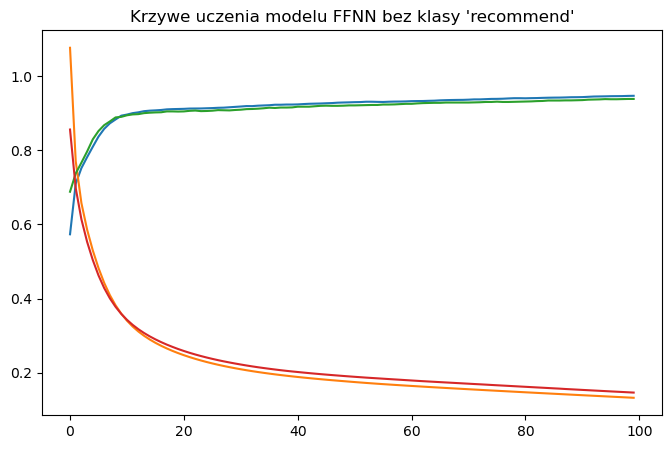

In [23]:
second_model.history = pd.DataFrame(data=result.history)
plt.figure(figsize=(8,5))
plt.plot(second_model.history)
plt.title("Krzywe uczenia modelu FFNN bez klasy 'recommend'")
plt.show()

Przyglądając się krzwym uczenia, można zauważyć, że model wraz ze wzrostem liczby epok popełnia coraz mniejszy błąd na zbiorze treningowym. Równocześnie zbieżność osiągana jest na zbiorze walidacyjym. Oznacza to, że model bardzo dobrze generalizuje. 

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step

Raport klasyfikacji:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
  very_recom       0.76      0.56      0.64        66
    priority       0.91      0.91      0.91       853
  spec_prior       0.92      0.95      0.93       809

    accuracy                           0.94      2592
   macro avg       0.90      0.85      0.87      2592
weighted avg       0.94      0.94      0.94      2592



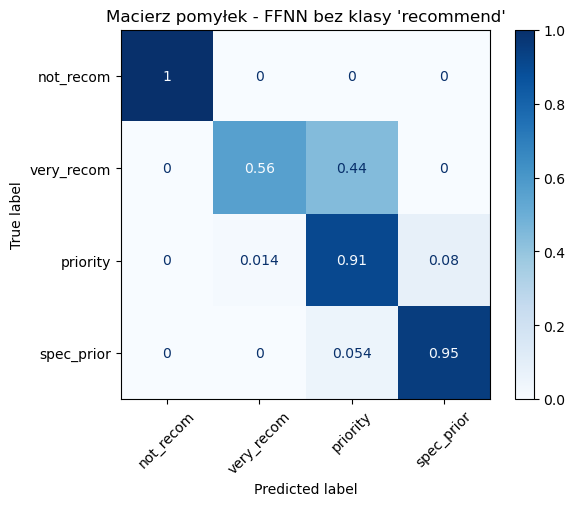

In [24]:
# W zbiorze testowym nie mamy klasy z oznaczeniem 1!
y_pred_second_model = second_model.predict(X2_test)
mlcm_for_best = multilabel_confusion_matrix(y2_test, np.argmax(y_pred_second_model, axis=1))
y_pred_classes_second_model = np.argmax(y_pred_second_model, axis=1)
print("\nRaport klasyfikacji:")
class_names_special = ['not_recom', 'very_recom', 'priority', 'spec_prior']
print(classification_report(y2_test, y_pred_classes_second_model, target_names=class_names_special))
cm_display = ConfusionMatrixDisplay.from_predictions(
    y2_test,
    y_pred_classes_second_model,
    display_labels=class_names_special,
    cmap=plt.cm.Blues,
    normalize='true',
    xticks_rotation= 45
)
cm_display.ax_.set_title("Macierz pomyłek - FFNN bez klasy 'recommend'")
plt.show()

# Dyskusja
Jak widać model nadal osiąga bardzo dobre wyniki, jednak bez strojenia hiperparametrów trudno jest uzyskać dobry wynik na niezbalansowanej klasie „very recommended". Ostatecznie najepszym modelem jest więc zastosowanie modelu z strojeniem hiperparametrów.

# Minimazliacja liczby cech

Zastanówmy się, czy można uzyskać równie dobre przewidywania, jeżeli dokona się minimalizacji liczby cech. Wykluczę cechy, które nie są istotne statystycznie na podstawie testu $\chi ^2$

In [25]:
from scipy.stats import chi2_contingency

labels = list(X.columns)
print(len(labels))
new_labels = []



for label in labels:
    # Tworzymy pełną tabelę krzyżową
    contingency_table = pd.crosstab(X[label], y)
    
    # Wykonujemy test chi2 na całej tabeli
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nCecha: {label}")
    print(f"  Chi2 = {chi2:.4f}")
    
    if p < 0.05:
        print(f"Cecha istotna statystycznie (p < 0.05)")
        new_labels.append(label)
    else:
        print(f"Cecha nieistotna statystycznie (p >= 0.05)")

print("\n" + "="*70)
print(f"\nWybrane cechy ({len(new_labels)}): {new_labels}")

significant_features = X[new_labels]
print(f"\nKształt zbioru z istotnymi cechami: {significant_features.shape}")
significant_features.head()

13

Cecha: has_nurs
  Chi2 = 3147.6269
Cecha istotna statystycznie (p < 0.05)

Cecha: children
  Chi2 = 212.8395
Cecha istotna statystycznie (p < 0.05)

Cecha: housing
  Chi2 = 330.7504
Cecha istotna statystycznie (p < 0.05)

Cecha: finance
  Chi2 = 76.3699
Cecha istotna statystycznie (p < 0.05)

Cecha: social
  Chi2 = 298.9892
Cecha istotna statystycznie (p < 0.05)

Cecha: health
  Chi2 = 13856.9677
Cecha istotna statystycznie (p < 0.05)

Cecha: parents_great_pret
  Chi2 = 1006.0443
Cecha istotna statystycznie (p < 0.05)

Cecha: parents_pretentious
  Chi2 = 19.9553
Cecha istotna statystycznie (p < 0.05)

Cecha: parents_usual
  Chi2 = 760.2274
Cecha istotna statystycznie (p < 0.05)

Cecha: form_complete
  Chi2 = 56.1649
Cecha istotna statystycznie (p < 0.05)

Cecha: form_completed
  Chi2 = 9.1864
Cecha nieistotna statystycznie (p >= 0.05)

Cecha: form_foster
  Chi2 = 58.4654
Cecha istotna statystycznie (p < 0.05)

Cecha: form_incomplete
  Chi2 = 6.2405
Cecha nieistotna statystycznie (p

,has_nurs,children,housing,finance,social,health,parents_great_pret,parents_pretentious,parents_usual,form_complete,form_foster
0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,True,False
1,0.0,0.0,0.0,0.0,0.0,1.0,False,False,True,True,False
2,0.0,0.0,0.0,0.0,0.0,2.0,False,False,True,True,False
3,0.0,0.0,0.0,0.0,1.0,0.0,False,False,True,True,False
4,0.0,0.0,0.0,0.0,1.0,1.0,False,False,True,True,False


In [26]:
y = nursery_data['pred']
X = significant_features

#klasy są niezbalansowane, więc albo usunięcie albo wprowadzenie wag
# użycie stratify, aby utrzymać proporcje klas w każdym zbiorze
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print("Kształt zbioru treningowego cech (X_train):", X_train.shape)
print("Kształt zbioru walidacyjnego cech (X_val):", X_val.shape)
print("Kształt zbioru testowego cech (X_test):", X_test.shape)
print("Kształt zbioru treningowego zmiennej docelowej (y_train):", y_train.shape)
print("Kształt zbioru walidacyjnego zmiennej docelowej (y_val):", y_val.shape)
print("Kształt zbioru testowego zmiennej docelowej (y_test):", y_test.shape)



Kształt zbioru treningowego cech (X_train): (7776, 11)
Kształt zbioru walidacyjnego cech (X_val): (2592, 11)
Kształt zbioru testowego cech (X_test): (2592, 11)
Kształt zbioru treningowego zmiennej docelowej (y_train): (7776,)
Kształt zbioru walidacyjnego zmiennej docelowej (y_val): (2592,)
Kształt zbioru testowego zmiennej docelowej (y_test): (2592,)


In [27]:
#strojenie hiperparametrów
def build_simple_model(hp):
    model = keras.Sequential()
    
    
    units_1 = hp.Int('units_1', min_value=10, max_value=100, step=10)
    model.add(layers.Dense(units_1, input_shape=(11,), activation='relu'))
    
    
    dropout_rate = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(layers.Dropout(dropout_rate))
    
    
    add_second_layer = hp.Boolean('add_second_layer')
    if add_second_layer:
        units_2 = hp.Int('units_2', min_value=10, max_value=50, step=10)
        model.add(layers.Dense(units_2, activation='relu'))
        model.add(layers.Dropout(dropout_rate))
    
   
    model.add(layers.Dense(5, activation='softmax'))
    
    
    optimizer = hp.Choice('optimizer', values=['sgd', 'adam', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    
    if optimizer == 'sgd':
        opt = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model


tuner = kt.Hyperband(
    build_simple_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='hyperparameter_tuning',
    project_name='nursery_ffnn'
)


print("Uruchamianie hyperparameter tuning z class_weight...\n")
tuner.search(
    X_train, y_train, 
    epochs=50, 
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,  
    verbose=1
)

Reloading Tuner from hyperparameter_tuning/nursery_ffnn/tuner0.json
Uruchamianie hyperparameter tuning z class_weight...



In [28]:
best_hps_simpler_model = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Najlepsze hiperparametry:")
print(f"- Liczba neuronów w 1. warstwie: {best_hps_simpler_model.get('units_1')}")
print(f"- Dropout: {best_hps_simpler_model.get('dropout')}")
print(f"- Druga warstwa: {best_hps_simpler_model.get('add_second_layer')}")
if best_hps_simpler_model.get('add_second_layer'):
    print(f"- Liczba neuronów w 2. warstwie: {best_hps_simpler_model.get('units_2')}")
print(f"- Optymalizator: {best_hps_simpler_model.get('optimizer')}")
print(f"- Learning rate: {best_hps_simpler_model.get('learning_rate'):.6f}")

#stworzenie modelu z najlepszymi parametrami
simpler_best_model = tuner.hypermodel.build(best_hps_simpler_model)
history__simpler_best = simpler_best_model.fit(
    X_train, y_train, 
    epochs=100, 
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,  
    verbose=0
)


print("\n" + "="*60)
print("WYNIKI NAJLEPSZEGO ZREDUKOWANEGO MODELU")
print("="*60)
train_loss, train_accuracy = simpler_best_model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = simpler_best_model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = simpler_best_model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Najlepsze hiperparametry:
- Liczba neuronów w 1. warstwie: 80
- Dropout: 0.0
- Druga warstwa: True
- Liczba neuronów w 2. warstwie: 10
- Optymalizator: rmsprop
- Learning rate: 0.001775


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



WYNIKI NAJLEPSZEGO ZREDUKOWANEGO MODELU
Train Accuracy: 0.9915
Val Accuracy: 0.9850
Test Accuracy: 0.9850


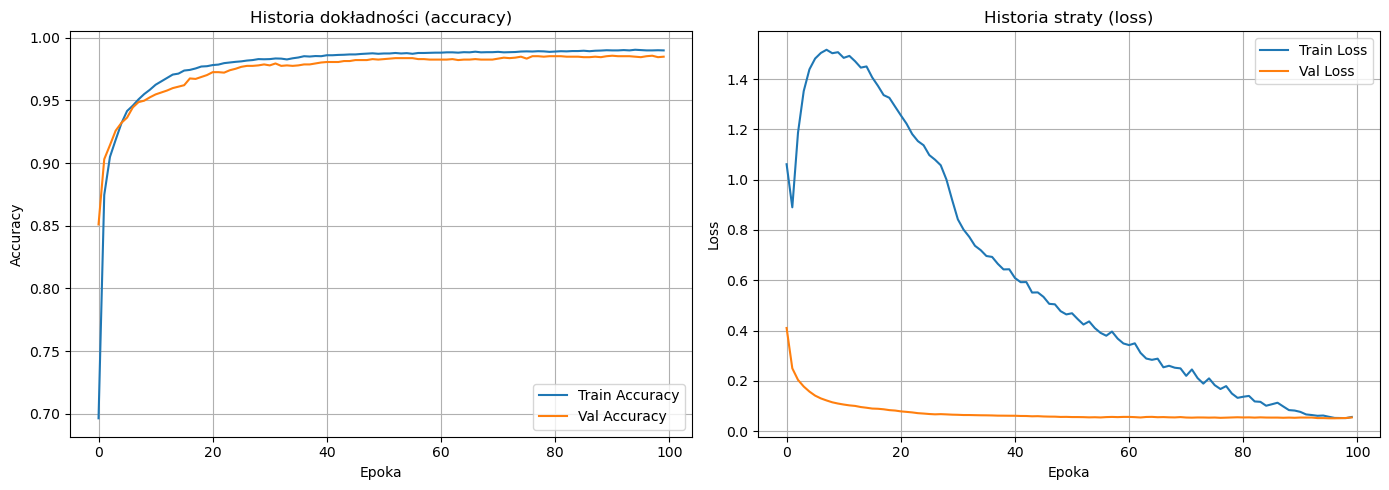

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].plot(history__simpler_best.history['accuracy'], label='Train Accuracy')
axes[0].plot(history__simpler_best.history['val_accuracy'], label='Val Accuracy')
axes[0].set_title('Historia dokładności (accuracy)')
axes[0].set_xlabel('Epoka')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)


axes[1].plot(history__simpler_best.history['loss'], label='Train Loss')
axes[1].plot(history__simpler_best.history['val_loss'], label='Val Loss')
axes[1].set_title('Historia straty (loss)')
axes[1].set_xlabel('Epoka')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step

Raport klasyfikacji:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
  very_recom       0.93      0.94      0.93        66
    priority       0.98      0.98      0.98       853
  spec_prior       0.98      0.98      0.98       809

    accuracy                           0.98      2592
   macro avg       0.97      0.97      0.97      2592
weighted avg       0.98      0.98      0.98      2592



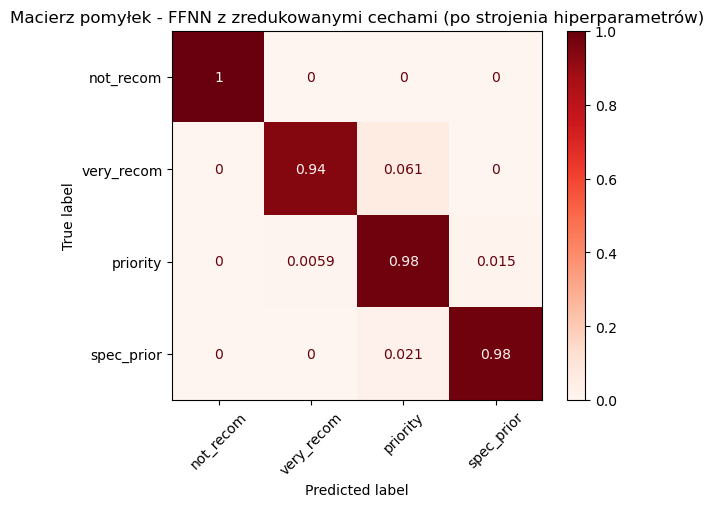

In [32]:
y_pred_simpler_best_model = simpler_best_model.predict(X_test)
mlcm_for_simpler_best = multilabel_confusion_matrix(y_test, np.argmax(y_pred_simpler_best_model, axis=1))
y_pred_classes_simpler_best_model = np.argmax(y_pred_simpler_best_model, axis=1)
print("\nRaport klasyfikacji:")
class_names_special = ['not_recom', 'very_recom', 'priority', 'spec_prior']
print(classification_report(y_test, y_pred_classes_simpler_best_model, target_names=class_names_special))
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_classes_simpler_best_model,
    display_labels=class_names_special,
    cmap=plt.cm.Reds,
    normalize='true',
    xticks_rotation= 45
)
cm_display.ax_.set_title("Macierz pomyłek - FFNN z zredukowanymi cechami (po strojenia hiperparametrów)")
plt.show()

# Dodatkowy wniosek
Okazało się, że można odrzucić dwie cechy z modelu i nadal otrzymywać bardzo dobyr wynik. Z 13 cech, które były wynikiem kodowania Ordinal i dummy, udało się zejść do 11 cech. 2 cechy okazały się więc nieistotne dla przewidzenia wartości klasy. 